In [7]:
import pandas as pd
import numpy as np

from analysis_functions import *



In [8]:
GRAB_MM_1 = pd.read_csv('GRAB_MMclosed_open_session1.csv', dtype=dtype_dict)
GRAB_MM_2 = pd.read_csv('GRAB_MMclosed_open_session2.csv', dtype=dtype_dict)

In [11]:
GRAB_MM_1[['Seconds','470_dfF']]

,Seconds,470_dfF
0,0.000,0.000010
1,0.001,0.000034
2,0.002,0.000057
3,0.003,0.000080
4,0.004,0.000103
...,...,...
9612049,1906.025,-0.884256
9612050,1906.026,-0.882351
9612051,1906.027,-0.880446
9612052,1906.028,-0.878541


In [45]:
from scipy.signal import butter, filtfilt

# Assuming your data is in a DataFrame called GRAB_MM_1
# Define parameters
fs = 10  # Sampling frequency in Hz
fc = 4.9  # Cutoff frequency in Hz (example: filter below 2 Hz)
order = 4  # Filter order

# Design Butterworth low-pass filter
nyquist = 0.5 * fs  # Nyquist frequency
normal_cutoff = fc / nyquist  # Normalized cutoff frequency
b, a = butter(order, normal_cutoff, btype='high', analog=False)

# Apply the filter to the '470_dfF' column
GRAB_MM_1['470_dfF_filtered'] = filtfilt(b, a, GRAB_MM_1['470_dfF'])

# Save or inspect the filtered data
print(GRAB_MM_1.head())



   Seconds   470_dfF  movementX  movementY  event ExperimentEvents  \
0    0.000  0.000010        0.0  -0.001593  False              NaN   
1    0.001  0.000034        0.0  -0.005134  False              NaN   
2    0.002  0.000057        0.0  -0.008675  False              NaN   
3    0.003  0.000080        0.0  -0.010692  False              NaN   
4    0.004  0.000103        0.0  -0.011462  False              NaN   

          Experiment Session mouseID sex area  No_halt  LinearMismatch_block  \
0  MMclosed-and-open    day1    B2M6   M  V2M    False                 False   
1  MMclosed-and-open    day1    B2M6   M  V2M    False                 False   
2  MMclosed-and-open    day1    B2M6   M  V2M    False                 False   
3  MMclosed-and-open    day1    B2M6   M  V2M    False                 False   
4  MMclosed-and-open    day1    B2M6   M  V2M    False                 False   

   LinearPlaybackMismatch_block  470_dfF_filtered  
0                         False      9.852776e

In [46]:
normal_cutoff

0.9800000000000001

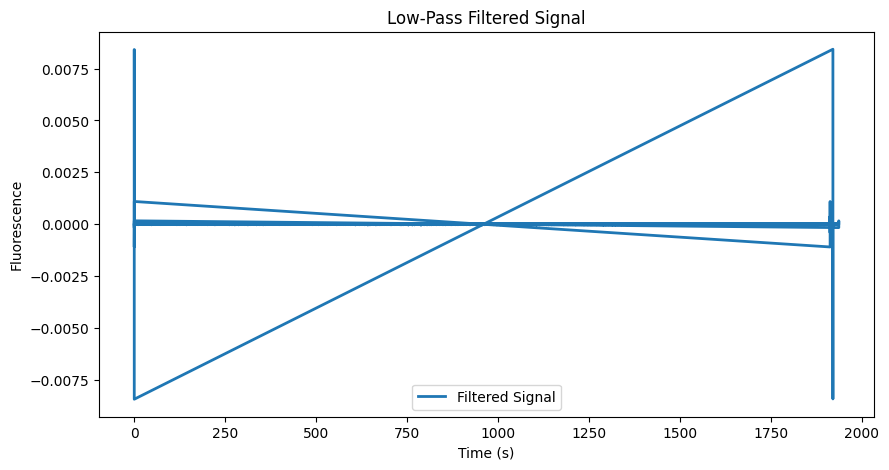

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(GRAB_MM_1['Seconds'], GRAB_MM_1['470_dfF_filtered'], label='Filtered Signal', linewidth=2)
#plt.plot(GRAB_MM_1['Seconds'], GRAB_MM_1['470_dfF'], label='Original Signal', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence')
plt.legend()
plt.title('Low-Pass Filtered Signal')
plt.show()
